## **IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings 
warnings.filterwarnings('ignore',category=DeprecationWarning)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## **DATA COLLECTION AND ANALYSIS**

In [2]:
df = pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [4]:
df.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74
5,Andhra Pradesh,30-06-2020,M,3.31,19805400,47.41,South,15.9129,79.74
6,Andhra Pradesh,31-07-2020,M,8.34,15431615,38.91,South,15.9129,79.74
7,Andhra Pradesh,31-08-2020,M,6.96,15251776,37.83,South,15.9129,79.74
8,Andhra Pradesh,30-09-2020,M,6.40,15220312,37.47,South,15.9129,79.74
9,Andhra Pradesh,31-10-2020,M,6.59,15157557,37.34,South,15.9129,79.74


In [5]:
df.tail(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
257,West Bengal,31-01-2020,M,6.94,35820789,47.35,East,22.9868,87.855
258,West Bengal,29-02-2020,M,4.92,36964178,47.74,East,22.9868,87.855
259,West Bengal,31-03-2020,M,6.92,35903917,47.27,East,22.9868,87.855
260,West Bengal,30-04-2020,M,17.41,26938836,39.90,East,22.9868,87.855
261,West Bengal,31-05-2020,M,17.41,28356675,41.92,East,22.9868,87.855
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [6]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [7]:
# RENAMING
df.rename(columns={'Region':'States',' Date':'Date',' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',' Estimated Employed':'Estimated Employed',' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate (%)','Region.1':'Region'},inplace=True)

In [8]:
df.isnull().sum()

States                                     0
Date                                       0
 Frequency                                 0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region                                     0
longitude                                  0
latitude                                   0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum()
    sum['missing%'] = (df.isna().sum().values*100)/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    # sum['value_counts']=train.value_counts()
    # sum['skew'] = train.skew().values
    desc = pd.DataFrame(df.describe().T)
    sum['min'] = desc['min']
    sum['max'] = desc['max']
    sum['mean'] = desc['mean']
    return sum

summary(df).style.background_gradient(cmap='YlOrRd')

,dtypes,missing#,missing%,uniques,count,min,max,mean
States,object,0,0.000000,27,267,nan,nan,nan
Date,object,0,0.000000,10,267,nan,nan,nan
Frequency,object,0,0.000000,1,267,nan,nan,nan
Estimated Unemployment Rate (%),float64,0,0.000000,252,267,0.500000,75.850000,12.236929
Estimated Employed,int64,0,0.000000,267,267,117542.000000,59433759.000000,13962105.722846
Estimated Labour Participation Rate (%),float64,0,0.000000,248,267,16.770000,69.690000,41.681573
Region,object,0,0.000000,5,267,nan,nan,nan
longitude,float64,0,0.000000,27,267,10.850500,33.778200,22.826048
latitude,float64,0,0.000000,24,267,71.192400,92.937600,80.532425


In [11]:
# DROPPING 
df.drop(columns=[' Frequency'],inplace=True)


# Estimated Employed by Region


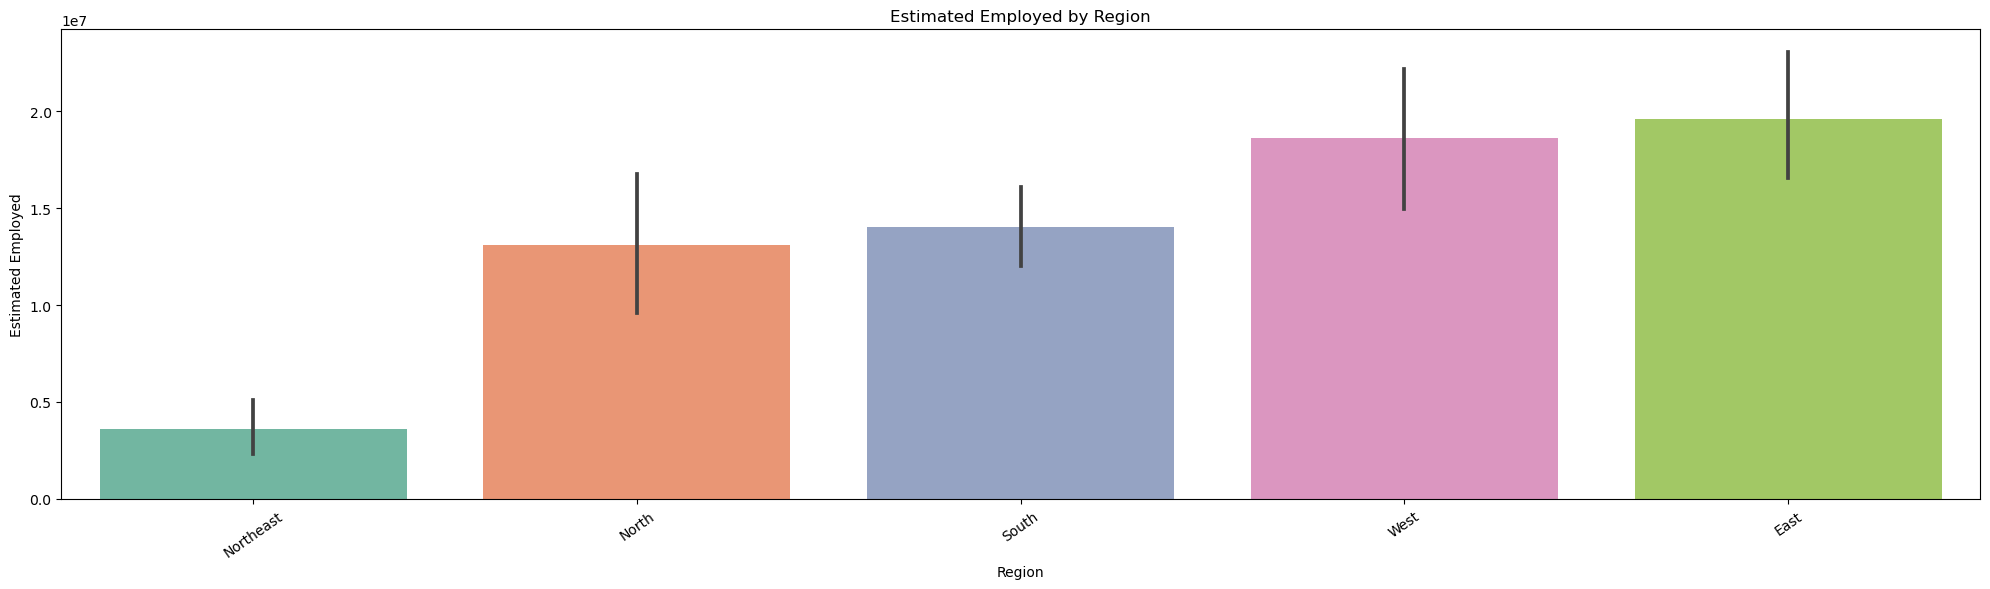

In [12]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=35)
sns.barplot(data=df, x='Region', y='Estimated Employed',palette='Set2',order=df.groupby('Region')['Estimated Employed'].mean().sort_values().index)  
plt.title('Estimated Employed by Region') 
plt.tight_layout()


# Estimated Unemployment Rate (%) with respect to the states


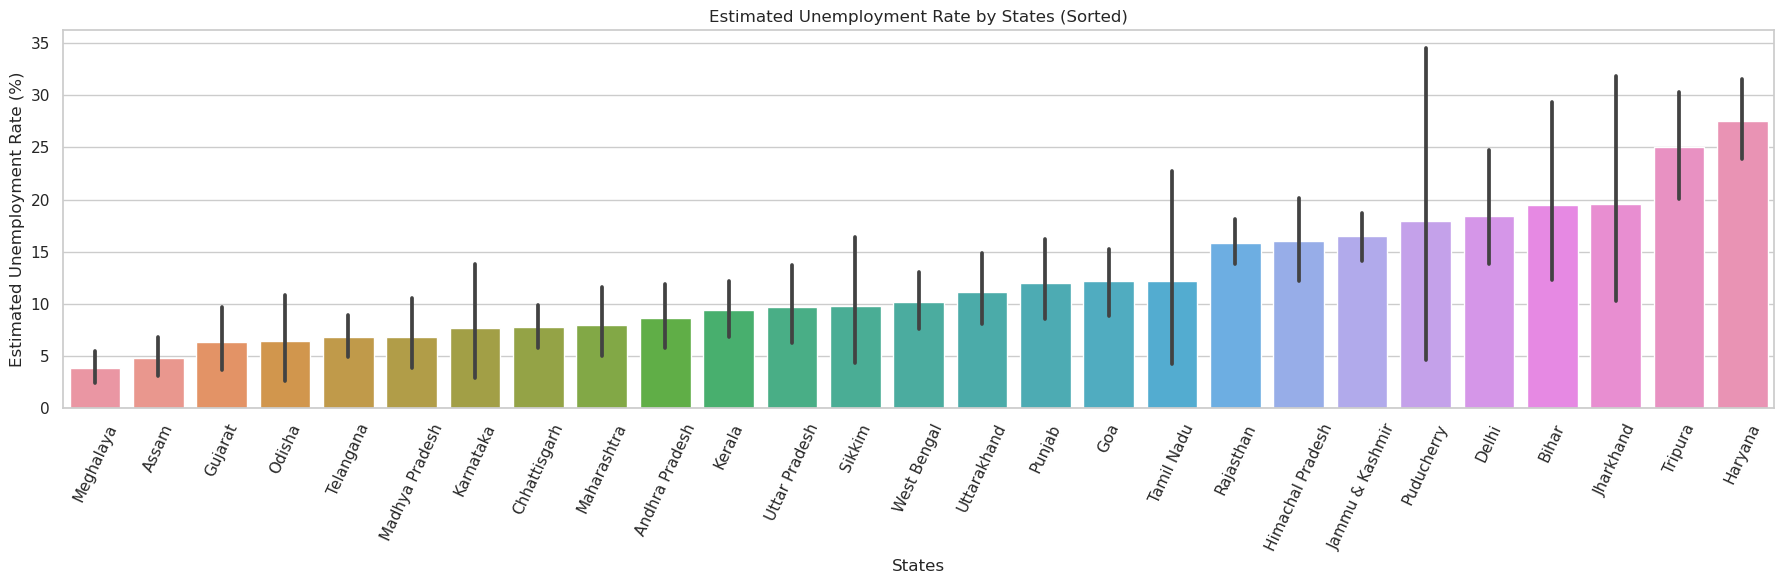

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 6))
sns.barplot(data=df, x='States', y='Estimated Unemployment Rate (%)', order=df.groupby('States')['Estimated Unemployment Rate (%)'].mean().sort_values().index)
plt.xlabel('States')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment Rate by States (Sorted)')
plt.xticks(rotation=65)  
plt.tight_layout()
plt.show()

# Sunburst chart showing unemployment rate in each region and state


In [14]:
# Sunburst chart showing unemployment rate in each region and state

unemplo_df = df[['States', 'Region', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']]
unemplo = unemplo_df.groupby(['Region', 'States'])['Estimated Unemployment Rate (%)'].mean().reset_index()
fig = px.sunburst(unemplo, path=['Region', 'States'], values='Estimated Unemployment Rate (%)',
                  color_continuous_scale='Plasma', title='Unemployment rate in each region and state',
                  height=650, template='ggplot2')
fig.show()

/tmp/ipykernel_21/58359773.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

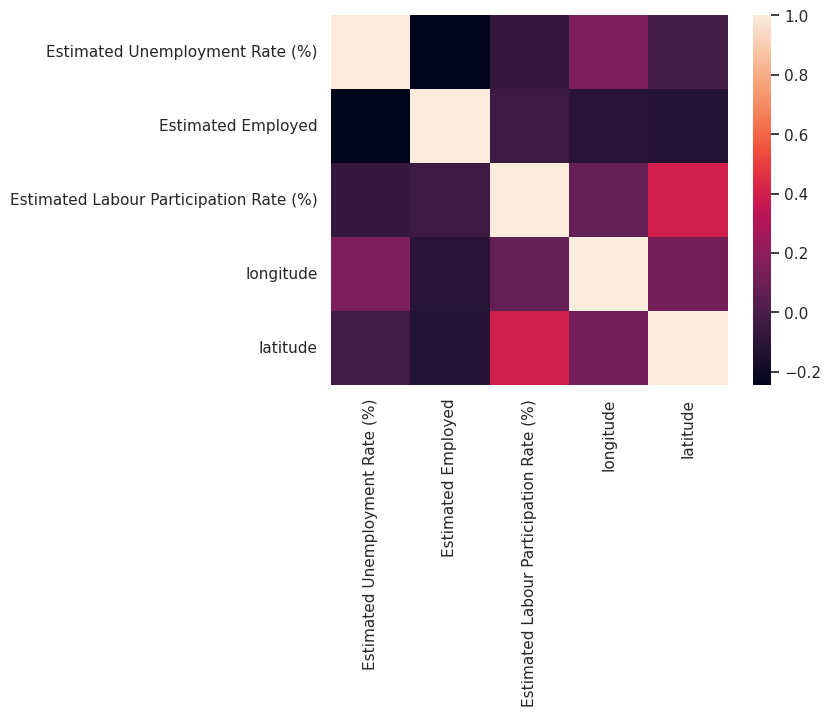

In [15]:
sns.heatmap(df.corr())

# 2019 to 2020

In [16]:
import datetime as dt


## **DATA COLLECTION AND ANALYSIS**

In [17]:
df1=pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment in India.csv')

In [18]:
df1.shape

(768, 7)

In [19]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [20]:
df1.rename(columns={'Region':'States',' Date':'Date',' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',' Estimated Employed':'Estimated Employed',' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate'},inplace=True)

In [21]:
df1['Date'] = pd.to_datetime(df1['Date'])


In [22]:
df1['Month']=df1['Date'].dt.month_name()
df1['Year']=df1['Date'].dt.year

In [23]:
df1.drop([' Frequency'],axis=1,inplace=True)


In [24]:
df1.head()

,States,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate,Area,Month,Year
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,May,2019.0
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,June,2019.0
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,July,2019.0
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,August,2019.0
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,September,2019.0


In [25]:
df1['Year'].value_counts()


2019.0    430
2020.0    310
Name: Year, dtype: int64

# Average Unemployment Rate In All Regions In Year(2019-2020)

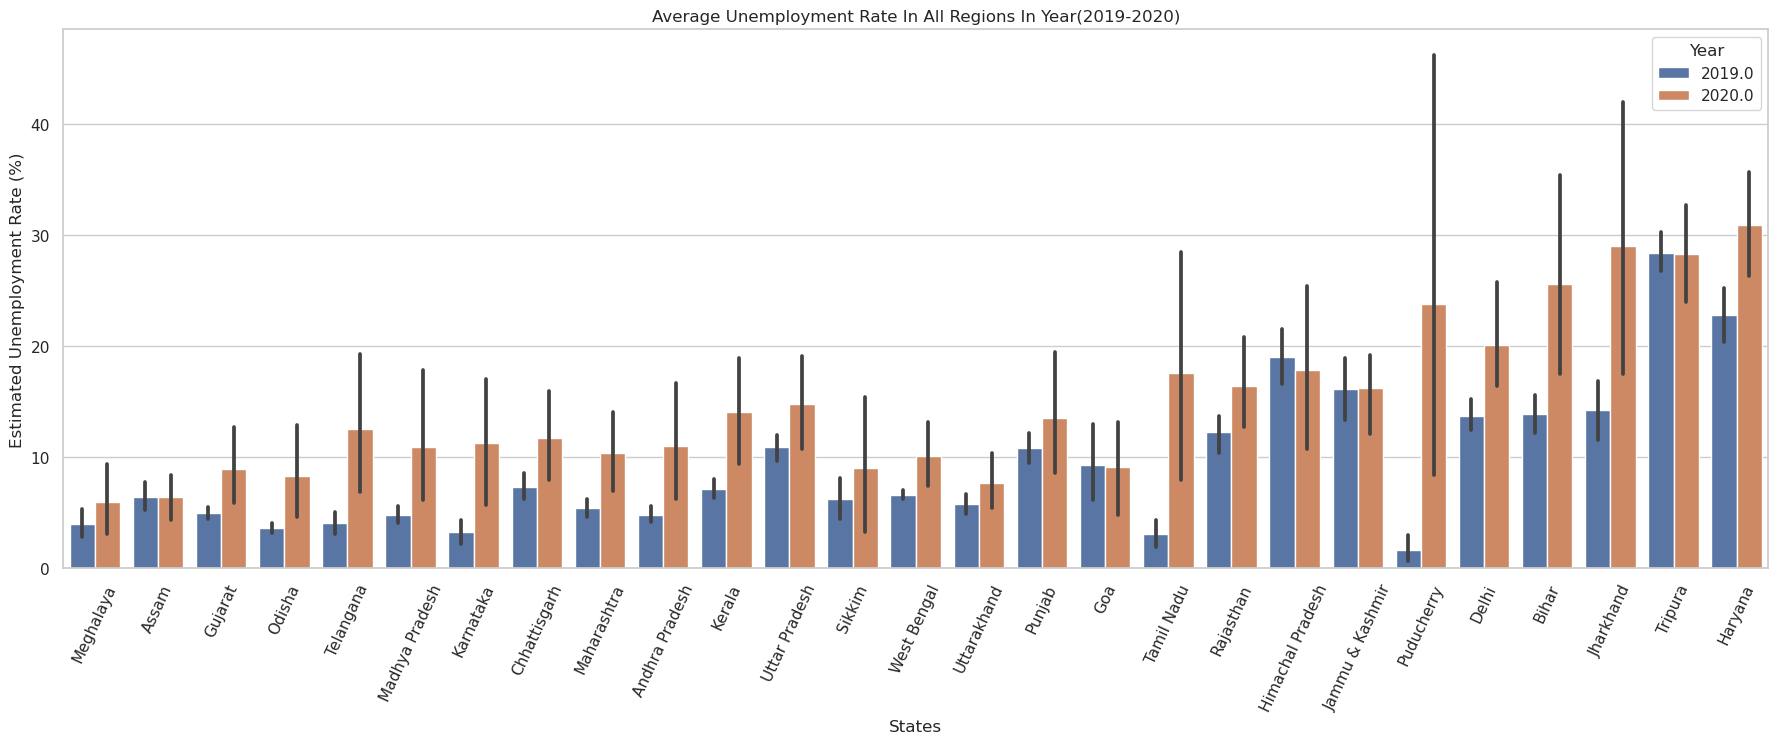

In [26]:
plt.figure(figsize=(22,7))
sns.barplot(data=df1,x='States',y='Estimated Unemployment Rate (%)',order=df.groupby('States')['Estimated Unemployment Rate (%)'].mean().sort_values().index,hue='Year')
plt.title("Average Unemployment Rate In All Regions In Year(2019-2020)")
plt.xticks(rotation=65)  
plt.show()# plt.tight_layout()

# Estimated Unemployment Rate (%)'by Area in year(2019-2020)

<Axes: xlabel='Area', ylabel='Estimated Unemployment Rate (%)'>

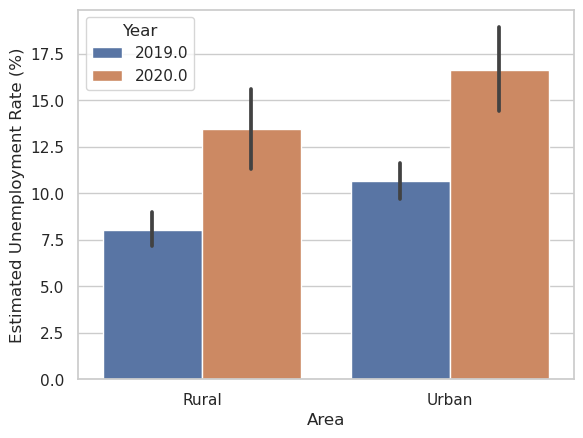

In [27]:
sns.barplot(data=df1,x='Area',y='Estimated Unemployment Rate (%)',hue='Year')

# Mean Estimated Unemployment Rate Over Time


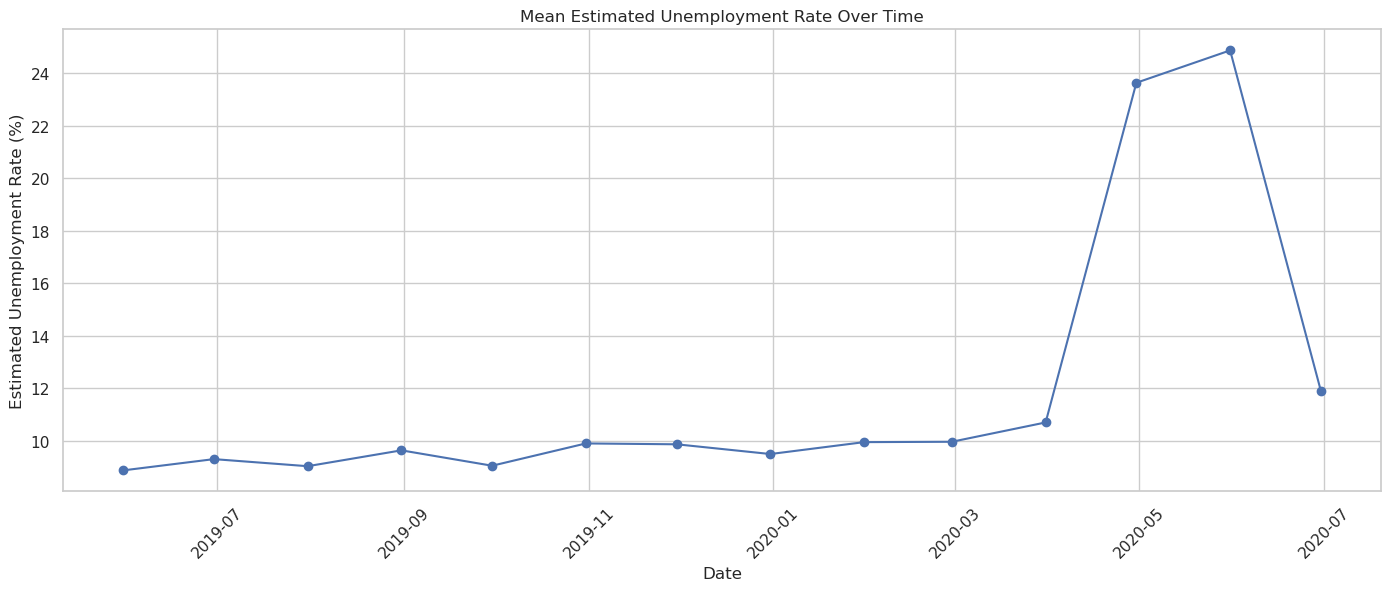

In [28]:
grouped = df1.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()
plt.figure(figsize=(17, 6))
plt.plot(grouped['Date'], grouped['Estimated Unemployment Rate (%)'], marker='o')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Mean Estimated Unemployment Rate Over Time')
plt.xticks(rotation=45)
plt.show()